In [1]:
import argparse
import time
import matplotlib.pyplot as plt
import numpy as np

from brainflow.board_shim import BoardShim, BrainFlowInputParams, BoardIds, BrainFlowPresets


In [5]:
BoardShim.enable_dev_board_logger()

board_id = 0
serial_port = "COM4"

params = BrainFlowInputParams()
params.serial_port = serial_port
board = BoardShim(board_id, params)
board.prepare_session()
sampling_rate = board.get_sampling_rate(board_id)   # per second, presumably

250

In [6]:
board.start_stream ()
time.sleep(10)
# data = board.get_current_board_data (256) # get latest 256 packages or less, doesnt remove them from internal buffer
data = board.get_board_data()  # get all data and remove it from internal buffer
board.stop_stream()
board.release_session()

In [7]:
data

array([[ 0.00000000e+00,  1.00000000e+00,  2.00000000e+00, ...,
         1.32000000e+02,  1.33000000e+02,  1.34000000e+02],
       [ 9.37499888e+04, -1.82503022e+05,  1.87500000e+05, ...,
         1.87500000e+05, -1.87500022e+05,  1.87500000e+05],
       [ 9.37499888e+04, -1.63623800e+05,  1.87500000e+05, ...,
        -1.87500022e+05, -1.87500022e+05, -1.87500022e+05],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.70940745e+09,  1.70940745e+09,  1.70940745e+09, ...,
         1.70940746e+09,  1.70940746e+09,  1.70940746e+09],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [8]:
data.shape

(24, 2438)

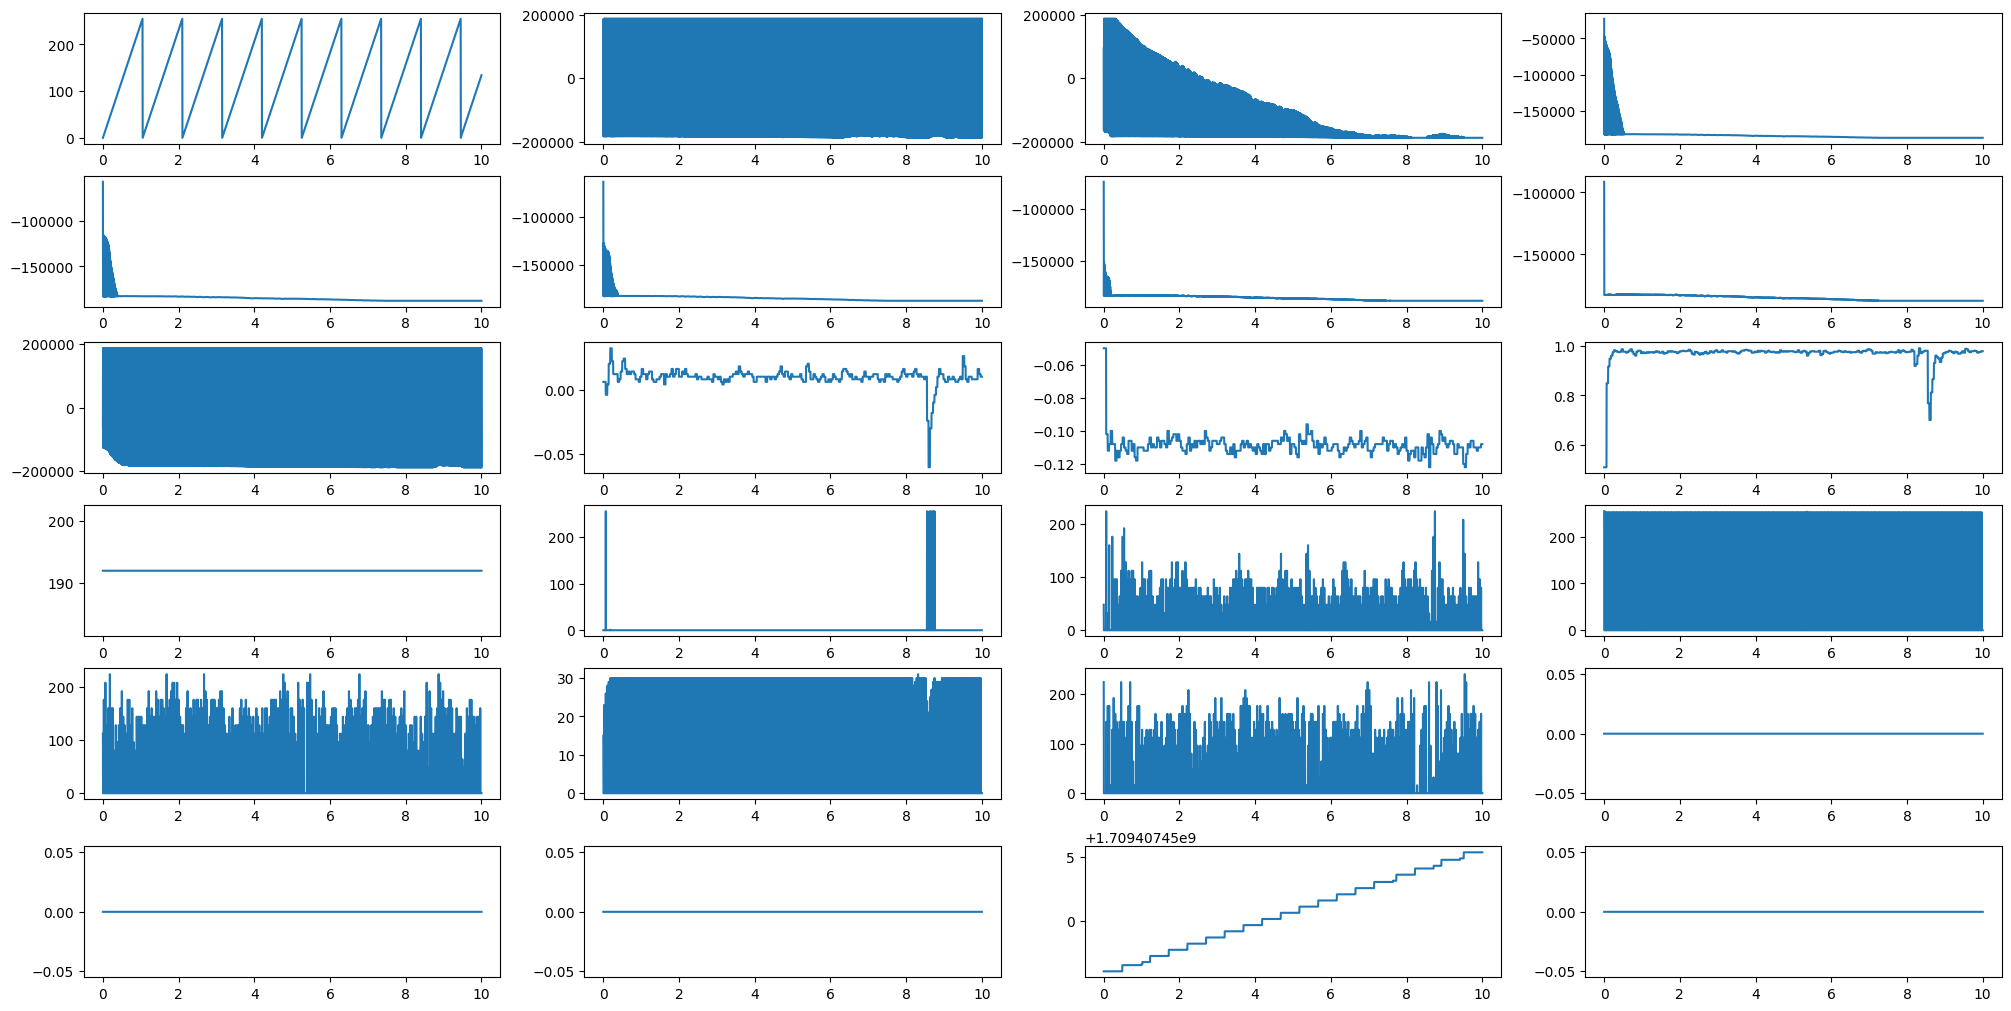

In [9]:
fig, axs = plt.subplots(6, 4, constrained_layout=True, figsize=(20, 10))
for i in range(6):
    for j in range(4):
        d = data[4 * i + j]
        axs[i][j].plot(np.linspace(0, 10, len(d)), d)

In [11]:
board.get_eeg_channels(board_id)

[1, 2, 3, 4, 5, 6, 7, 8]